In [2]:
#importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold,cross_val_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix

In [3]:
df = pd.read_csv('C:/Users/knvss/OneDrive/Desktop/winequalityN.csv')

In [5]:
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
np.unique(df.quality.values.tolist())


array([3, 4, 5, 6, 7, 8, 9])

In [7]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df.drop_duplicates(inplace=True)


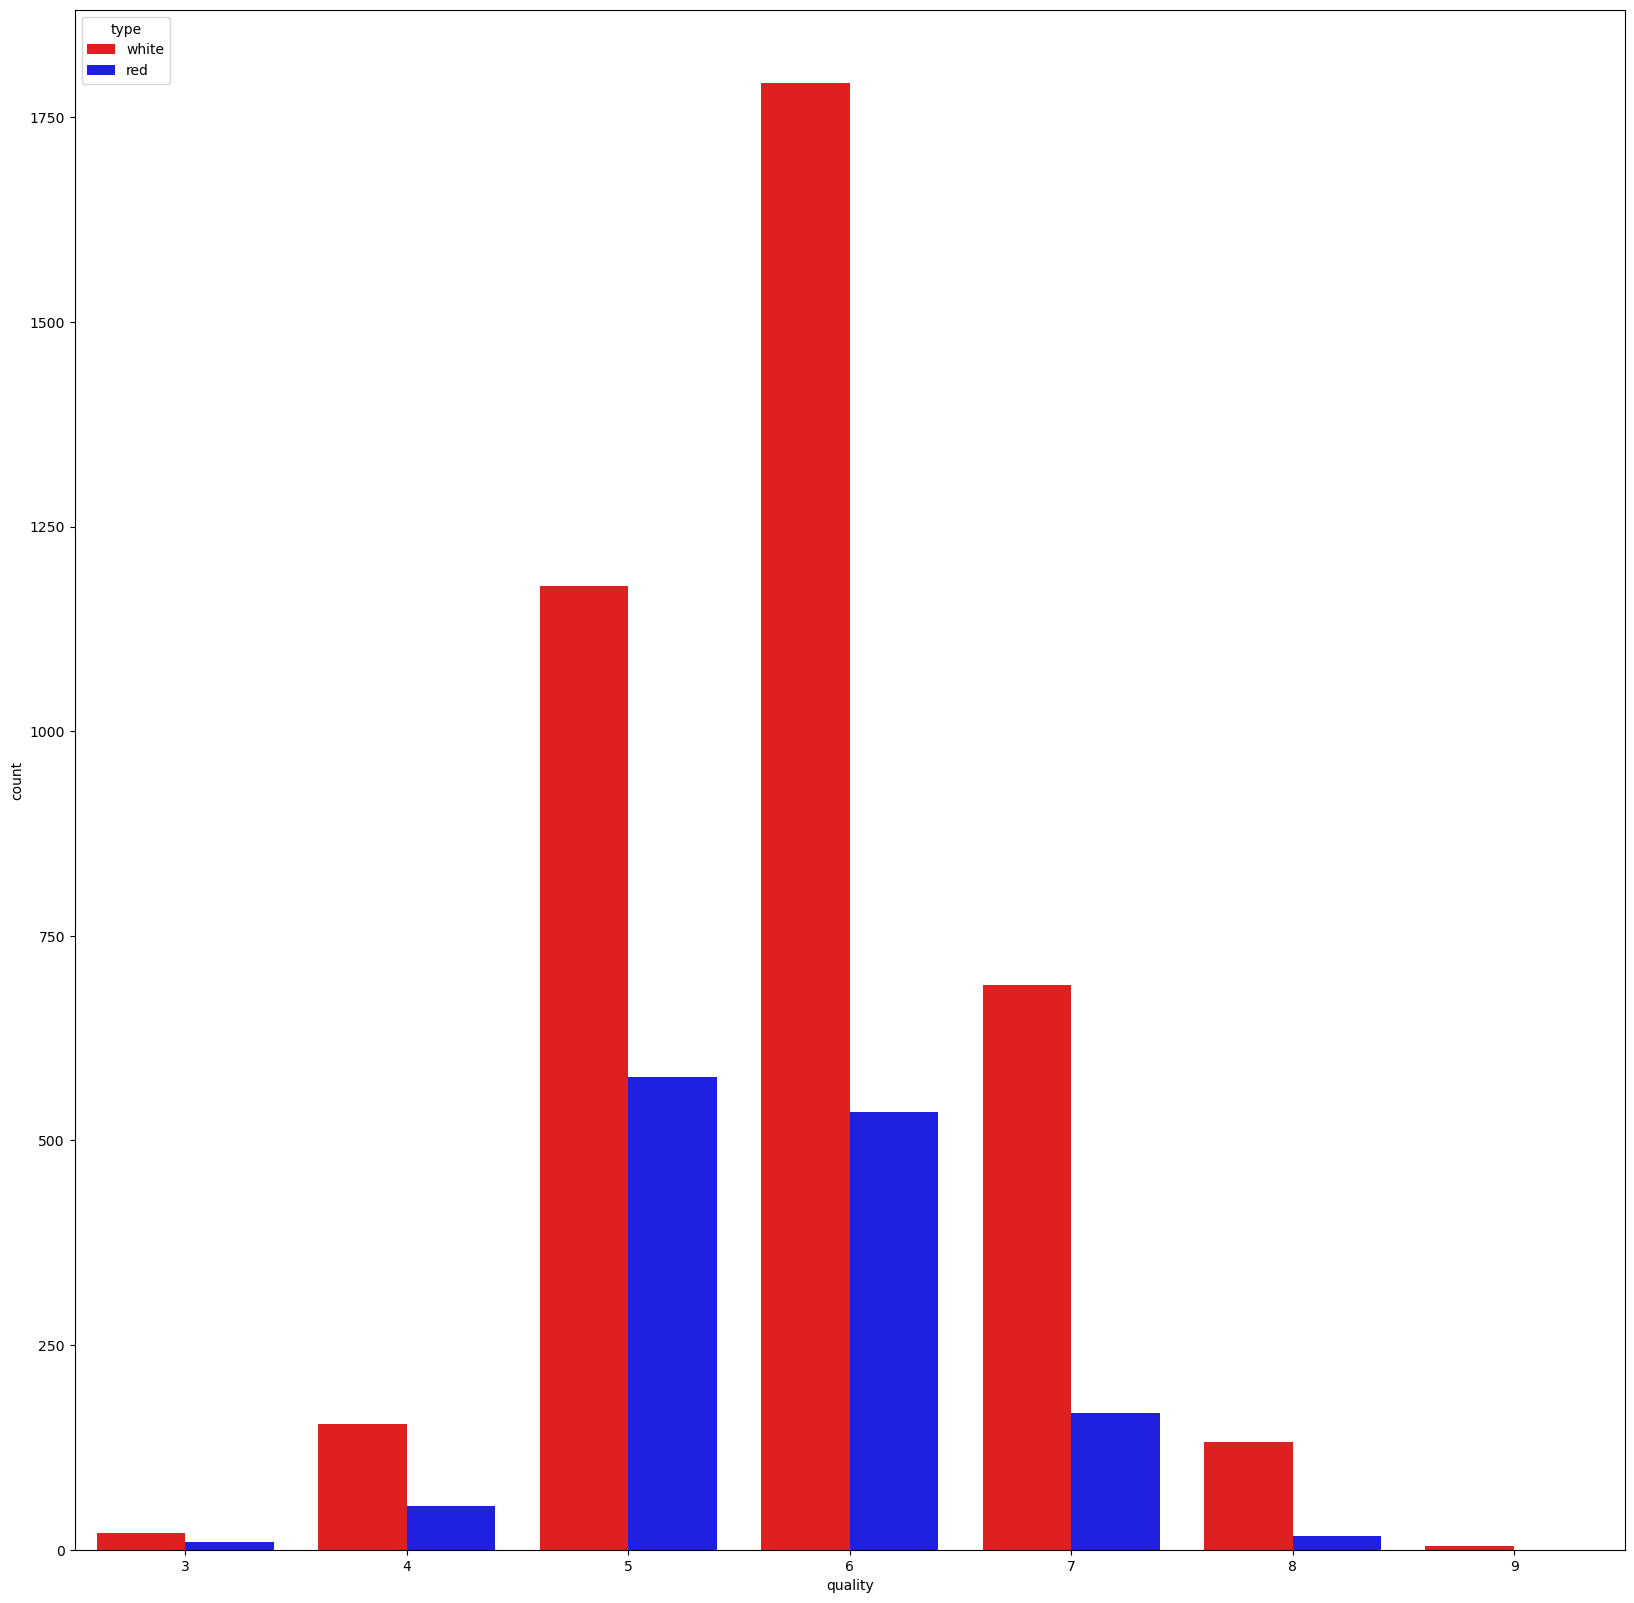

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(x='quality',hue='type', data=df, palette= ['red','blue'])
plt.show()

<AxesSubplot:>

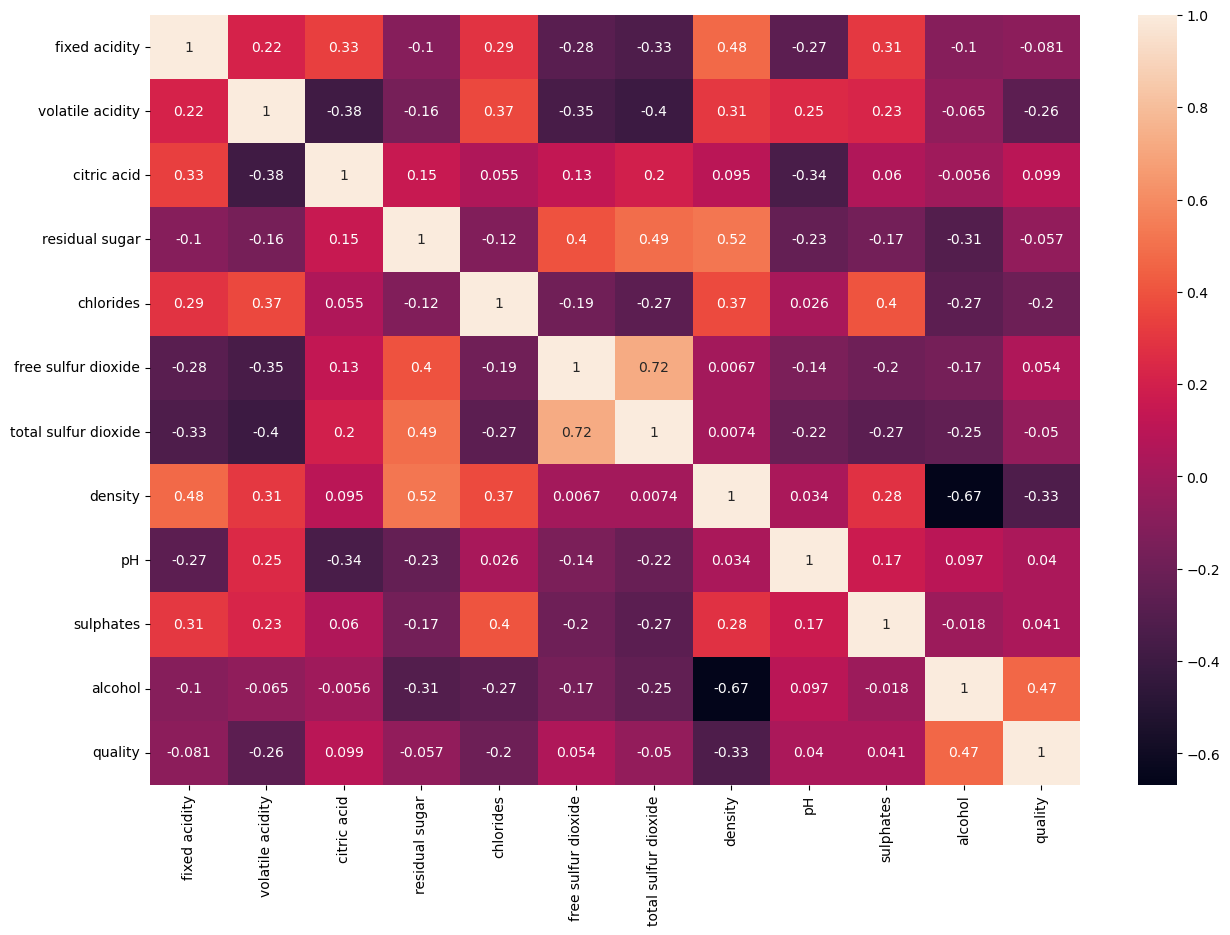

In [10]:
correlation_matrix = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True)

In [11]:
le = LabelEncoder()
df.type = le.fit_transform(df.type.values)

In [12]:
df.type


0       1
1       1
2       1
3       1
6       1
       ..
6491    0
6492    0
6493    0
6495    0
6496    0
Name: type, Length: 5329, dtype: int32

In [14]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [15]:
features = df.drop(['type'],axis=1)
labels = df['type']

In [16]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2, random_state=42)
df.dtypes

type                    float64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [18]:
random_state=42
# preparing models
models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(("Gradient Boosting", GradientBoostingClassifier()))
models.append(("AdaBoost", AdaBoostClassifier()))

In [19]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=random_state)
    cv_results = cross_val_score(model, features, labels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.992634 (0.002731)
Decision Tree: 0.980923 (0.006732)
Random Forest: 0.993768 (0.002395)
Gradient Boosting: 0.992822 (0.003251)
AdaBoost: 0.992446 (0.002532)


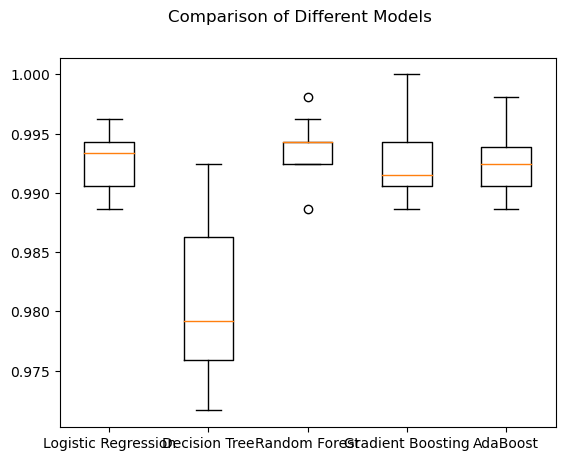

In [20]:
fig = plt.figure()
fig.suptitle('Comparison of Different Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
cls1 = RandomForestClassifier(random_state=7)
cls1.fit(X_train,y_train)
y_pred = cls1.predict(X_test)

In [22]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9924457034938622
[[268   7]
 [  1 783]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       275
         1.0       0.99      1.00      0.99       784

    accuracy                           0.99      1059
   macro avg       0.99      0.99      0.99      1059
weighted avg       0.99      0.99      0.99      1059



In [23]:
cls2 = GradientBoostingClassifier(random_state=7)
cls2.fit(X_train,y_train)
y_pred = cls2.predict(X_test)